# Implementing Deep Learning Model to Fashion MNIST Dataset

__Import Libraries__

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import keras
np.random.seed(42)

Using TensorFlow backend.


__Load the data set__

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


---

## Building Simple Neural Nets

__Preprocessing__

In [0]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


In [0]:
NUM_CLASSES = 10

# reshape X_train and X_test 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

# normalize 
X_train = X_train / 255.0
X_test = X_test / 255.0

# format the y_train and y_test
Y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = keras.utils.np_utils.to_categorical(y_test, NUM_CLASSES)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_train.shape: ", Y_train.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (60000, 784)
X_test.shape:  (10000, 784)
Y_train.shape:  (60000, 10)
Y_test.shape:  (10000, 10)


### First Model

In [0]:
# =========== constants ==========
NUM_CLASSES = 10
NUM_EPOCHS = 20
VERBOSE = 1
BATCH_SIZE = 64
OPTIMIZER = keras.optimizers.SGD()
VALIDATION_SPLIT = 0.1

# ========= build the model ==========
model = keras.models.Sequential()
model.add(keras.layers.Dense(NUM_CLASSES, input_shape=(X_train.shape[1],)))
model.add(keras.layers.Activation('softmax'))

# ======== compile the model ===========
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# ======== train the model ==========
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT, epochs=NUM_EPOCHS)

# ========= evaluation ==========
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])
model.summary()

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 30us/step - loss: 1.0008 - acc: 0.6857 - val_loss: 0.7313 - val_acc: 0.7667
Epoch 2/20
54000/54000 [==============================] - 1s 27us/step - loss: 0.6874 - acc: 0.7792 - val_loss: 0.6360 - val_acc: 0.7962
Epoch 3/20
54000/54000 [==============================] - 2s 28us/step - loss: 0.6199 - acc: 0.8004 - val_loss: 0.5901 - val_acc: 0.8093
Epoch 4/20
54000/54000 [==============================] - 1s 28us/step - loss: 0.5830 - acc: 0.8107 - val_loss: 0.5636 - val_acc: 0.8148
Epoch 5/20
54000/54000 [==============================] - 1s 27us/step - loss: 0.5587 - acc: 0.8181 - val_loss: 0.5465 - val_acc: 0.8165
Epoch 6/20
54000/54000 [==============================] - 2s 29us/step - loss: 0.5410 - acc: 0.8232 - val_loss: 0.5299 - val_acc: 0.8233
Epoch 7/20
54000/54000 [==============================] - 1s 28us/step - loss: 0.5277 - acc: 0.8260 - val_loss: 0.5184 - val_acc:

__Visualizing__

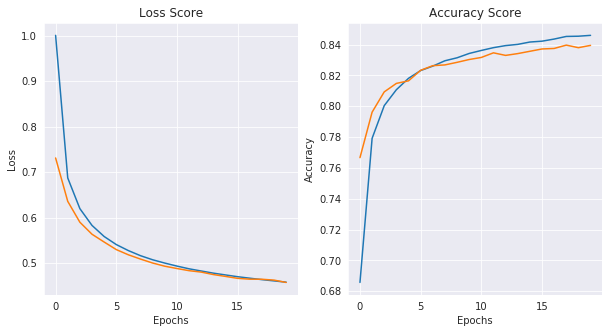

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set_title('Loss Score')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set_title('Accuracy Score')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy');

### Second Model

Using deeper neural net:

In [0]:
# =========== constants ==========
NUM_CLASSES = 10
NUM_EPOCHS = 20
VERBOSE = 1
BATCH_SIZE = 64
OPTIMIZER = keras.optimizers.SGD()
VALIDATION_SPLIT = 0.1
N_INPUT = 64

# ======= build the model ========
model = keras.models.Sequential()
model.add(keras.layers.Dense(N_INPUT, input_shape=(X_train.shape[1],)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ========== compile the model ============
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy',
              metrics=['accuracy'])

# ========= train the model ==============
history = model.fit(X_train, Y_train, verbose=VERBOSE, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)

# ======== evaluation =============
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])
model.summary()

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 41us/step - loss: 0.9592 - acc: 0.6998 - val_loss: 0.6726 - val_acc: 0.7750
Epoch 2/20
54000/54000 [==============================] - 2s 37us/step - loss: 0.6144 - acc: 0.7965 - val_loss: 0.5580 - val_acc: 0.8078
Epoch 3/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.5449 - acc: 0.8181 - val_loss: 0.5205 - val_acc: 0.8202
Epoch 4/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.5089 - acc: 0.8281 - val_loss: 0.4888 - val_acc: 0.8298
Epoch 5/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.4858 - acc: 0.8351 - val_loss: 0.4715 - val_acc: 0.8313
Epoch 6/20
54000/54000 [==============================] - 2s 37us/step - loss: 0.4686 - acc: 0.8404 - val_loss: 0.4661 - val_acc: 0.8333
Epoch 7/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.4560 - acc: 0.8440 - val_loss: 0.4523 - val_acc:

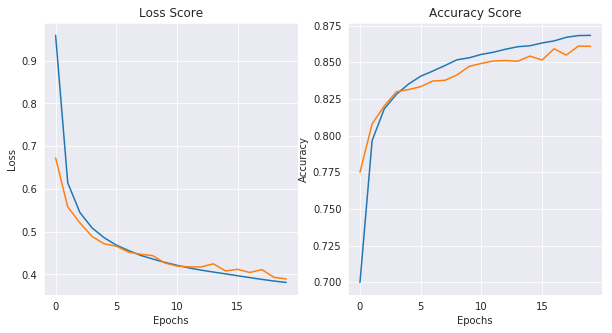

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set_title('Loss Score')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set_title('Accuracy Score')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy');

###  Third Model

Using deeper neural net with dropout 

In [0]:
# =========== constants ==========
NUM_CLASSES = 10
NUM_EPOCHS = 30
VERBOSE = 1
BATCH_SIZE = 64
OPTIMIZER = keras.optimizers.Adam()
VALIDATION_SPLIT = 0.1
N_INPUT = 64
N_HIDDEN_1 = 256
N_HIDDEN_2 = 128
N_HIDDEN_3 = 64
DROPOUT_RATE = 0.2

# ========= build the model ==========
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Dense(N_INPUT, input_shape=(X_train.shape[1],)))
model.add(keras.layers.Activation('relu'))
# 1st hidden layer
model.add(keras.layers.Dense(N_HIDDEN_1))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
# 2nd hidden layer
model.add(keras.layers.Dense(N_HIDDEN_2))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(DROPOUT_RATE+0.1))
# 3rd hidden layer
model.add(keras.layers.Dense(N_HIDDEN_3))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(DROPOUT_RATE))
# output layer
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ============ compile the model ============
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy',
              metrics=['accuracy'])

# ============ train the model ================
history = model.fit(X_train, Y_train, verbose=VERBOSE, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)

# ============= evaluation ================
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 104us/step - loss: 0.6845 - acc: 0.7576 - val_loss: 0.4365 - val_acc: 0.8437
Epoch 2/30
54000/54000 [==============================] - 4s 80us/step - loss: 0.4495 - acc: 0.8415 - val_loss: 0.4025 - val_acc: 0.8540
Epoch 3/30
54000/54000 [==============================] - 4s 79us/step - loss: 0.4051 - acc: 0.8563 - val_loss: 0.3782 - val_acc: 0.8633
Epoch 4/30
54000/54000 [==============================] - 5s 88us/step - loss: 0.3803 - acc: 0.8644 - val_loss: 0.3646 - val_acc: 0.8658
Epoch 5/30
54000/54000 [==============================] - 5s 85us/step - loss: 0.3602 - acc: 0.8712 - val_loss: 0.3913 - val_acc: 0.8640
Epoch 6/30
54000/54000 [==============================] - 5s 85us/step - loss: 0.3468 - acc: 0.8767 - val_loss: 0.3398 - val_acc: 0.8748
Epoch 7/30
54000/54000 [==============================] - 4s 80us/step - loss: 0.3356 - acc: 0.8799 - val_loss: 0.3498 - val_acc

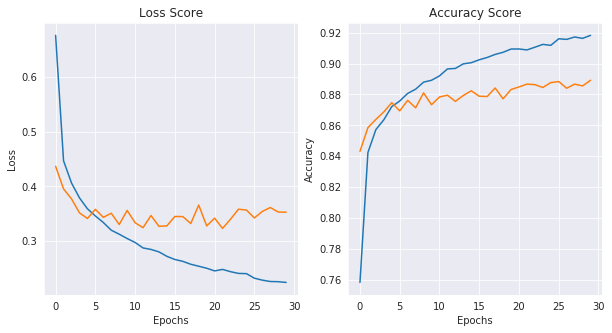

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set_title('Loss Score')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set_title('Accuracy Score')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy');

---

## Deep Learning Using Covnets

__Preprocessing__

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
# constants
NUM_CLASSES = 10
IMG_ROWS, IMG_COLS = 28, 28

print("Before preprocessing: ")
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

# cast to float32 and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape the data
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

# transform the labels
Y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = keras.utils.np_utils.to_categorical(y_test, NUM_CLASSES)

print("\nAfter preprocessing: ")
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", Y_train.shape)
print("y_test.shape: ", Y_test.shape)


Before preprocessing: 
X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (60000,)
y_test.shape:  (10000,)

After preprocessing: 
X_train.shape:  (60000, 28, 28, 1)
X_test.shape:  (10000, 28, 28, 1)
y_train.shape:  (60000, 10)
y_test.shape:  (10000, 10)


### First Model

In [0]:
# ======== constants =========
NUM_EPOCHS = 25
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
VALIDATION_SPLIT = 0.1

# =========== build the model ==============
model = keras.models.Sequential()
# 1st convolutional layer
model.add(keras.layers.Conv2D(20, kernel_size=5, padding='same',
                              input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
# output layer
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ========== compile the model ===========
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# ============ train the model ================
history = model.fit(X_train, Y_train, verbose=VERBOSE, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)

# ========== evaluation ================
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 48s 886us/step - loss: 0.9549 - acc: 0.6756 - val_loss: 0.6136 - val_acc: 0.7803
Epoch 2/25
54000/54000 [==============================] - 47s 864us/step - loss: 0.6310 - acc: 0.7733 - val_loss: 0.6039 - val_acc: 0.7893
Epoch 3/25
54000/54000 [==============================] - 47s 866us/step - loss: 0.5556 - acc: 0.8017 - val_loss: 0.5278 - val_acc: 0.8018
Epoch 4/25
54000/54000 [==============================] - 47s 870us/step - loss: 0.5116 - acc: 0.8183 - val_loss: 0.4813 - val_acc: 0.8310
Epoch 5/25
54000/54000 [==============================] - 47s 873us/step - loss: 0.4855 - acc: 0.8278 - val_loss: 0.5260 - val_acc: 0.8045
Epoch 6/25
54000/54000 [==============================] - 47s 871us/step - loss: 0.4640 - acc: 0.8346 - val_loss: 0.4630 - val_acc: 0.8385
Epoch 7/25
54000/54000 [==============================] - 47s 872us/step - loss: 0.4451 - acc: 0.8437 - val_loss: 0.

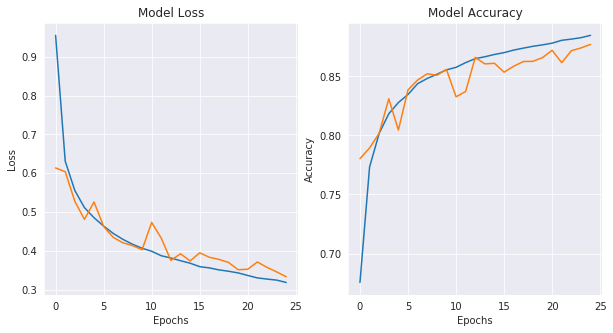

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');

### Second Model

In [0]:
# ======== constants =========
NUM_EPOCHS = 25
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
VALIDATION_SPLIT = 0.1

# =========== build the model ==============
model = keras.models.Sequential()
# 1st convolutional layer
model.add(keras.layers.Conv2D(20, kernel_size=5, padding='same',
                              input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# 2nd convolutional layer
model.add(keras.layers.Conv2D(50, kernel_size=5, border_mode='same' ))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
# output layer
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ========== compile the model ===========
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# ============ train the model ================
history = model.fit(X_train, Y_train, verbose=VERBOSE, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)

# ========== evaluation ================
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
  app.launch_new_instance()


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 103s 2ms/step - loss: 1.1244 - acc: 0.6188 - val_loss: 0.6791 - val_acc: 0.7610
Epoch 2/25
54000/54000 [==============================] - 102s 2ms/step - loss: 0.6661 - acc: 0.7584 - val_loss: 0.5823 - val_acc: 0.7912
Epoch 3/25
54000/54000 [==============================] - 102s 2ms/step - loss: 0.5729 - acc: 0.7916 - val_loss: 0.5213 - val_acc: 0.8080
Epoch 4/25
54000/54000 [==============================] - 102s 2ms/step - loss: 0.5211 - acc: 0.8108 - val_loss: 0.5444 - val_acc: 0.8078
Epoch 5/25
54000/54000 [==============================] - 101s 2ms/step - loss: 0.4845 - acc: 0.8233 - val_loss: 0.4618 - val_acc: 0.8330
Epoch 6/25
54000/54000 [==============================] - 101s 2ms/step - loss: 0.4543 - acc: 0.8362 - val_loss: 0.4459 - val_acc: 0.8400
Epoch 7/25
54000/54000 [==============================] - 102s 2ms/step - loss: 0.4352 - acc: 0.8436 - val_loss: 0.4335 - v

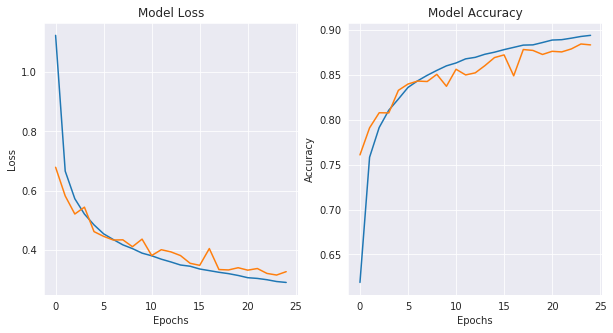

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');